# 🎓 Unsupervised Learning Project
Neville's Anime Clustering Analysis

# 🎯 Unsupervised Learning for Anime Recommendation

## Project Overview
This project explores how unsupervised learning techniques can be applied to anime rating data to uncover hidden patterns, group similar users, and generate personalized recommendations.

## Objective
- Cluster anime and users based on viewing and rating behavior.
- Use dimensionality reduction to visualize relationships.
- Build user profiles and compute similarities.
- Generate recommendations using collaborative filtering.

## Why Unsupervised Learning?
Unlike supervised models, unsupervised learning allows us to:
- Discover latent structures without labeled outcomes.
- Group similar entities (users/anime) based on behavior.
- Enable scalable recommendation systems without explicit feedback.

In [3]:
import pandas as pd

# Load datasets
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", nrows=100000)
test_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\test.csv")

In [4]:
import pandas as pd

# Load anime metadata
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv", usecols=["anime_id", "genre", "type"])

# Load train data (only necessary columns)
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", usecols=["user_id", "anime_id", "rating"])

# Ensure sample size does not exceed available data
sample_size = min(3000, len(train_df))
train_sample = train_df.sample(n=sample_size, random_state=42)

# Merge with anime metadata
merged_df = pd.merge(train_sample, anime_df, on="anime_id", how="left")

# Drop rows with missing values in genre or type
merged_df = merged_df.dropna(subset=["genre", "type"])

# Encode categorical features
merged_df['genre'] = merged_df['genre'].astype(str)
merged_df['type'] = merged_df['type'].astype(str)
merged_df['genre_encoded'] = merged_df['genre'].astype('category').cat.codes
merged_df['type_encoded'] = merged_df['type'].astype('category').cat.codes

# Log progress
print("Sampled 3,000 rows from train_df to reduce memory usage.")
print("Merged with anime_df to enrich with metadata.")
print("Dropped missing values to clean the dataset.")
print("Encoded genre and type as categorical numeric codes for modeling.")
print(merged_df.head())


Sampled 3,000 rows from train_df to reduce memory usage.
Merged with anime_df to enrich with metadata.
Dropped missing values to clean the dataset.
Encoded genre and type as categorical numeric codes for modeling.
   user_id  anime_id  rating  \
0    27973      9989       8   
1    50603      6007       7   
2    27254      2109       7   
3    53284        72       9   
4    17373      8074       6   

                                               genre type  genre_encoded  \
0                 Drama, Slice of Life, Supernatural   TV            855   
1                       Fantasy, Historical, Romance  OVA            870   
2  Action, Adventure, Game, Mecha, School, Sci-Fi...   TV             93   
3                             Action, Comedy, School   TV            186   
4                Action, Ecchi, Horror, Supernatural   TV            265   

   type_encoded  
0             5  
1             3  
2             5  
3             5  
4             5  


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load anime metadata
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv")

# Load first 100,000 rows from train.csv to avoid memory issues
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", nrows=100000)

# Merge train data with anime metadata
merged_df = pd.merge(train_df, anime_df, on="anime_id", how="left")

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Encode categorical features
merged_df['genre'] = merged_df['genre'].astype(str)
merged_df['type'] = merged_df['type'].astype(str)
merged_df['genre_encoded'] = merged_df['genre'].astype('category').cat.codes
merged_df['type_encoded'] = merged_df['type'].astype('category').cat.codes

# Log summary
print("Loaded full anime metadata.")
print("Loaded the first 100,000 rows from train.csv to avoid memory issues.")
print("Merged the two datasets on anime_id.")
print("Dropped missing values to clean the data.")
print("Encoded genre and type as categorical numeric codes.")



Loaded full anime metadata.
Loaded the first 100,000 rows from train.csv to avoid memory issues.
Merged the two datasets on anime_id.
Dropped missing values to clean the data.
Encoded genre and type as categorical numeric codes.


In [6]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['rating_x', 'rating_y', 'members', 'genre_encoded', 'type_encoded']
X = merged_df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Selected features for clustering: rating_x, rating_y, members, genre_encoded, type_encoded.")
print("Standardized features using StandardScaler.")

Selected features for clustering: rating_x, rating_y, members, genre_encoded, type_encoded.
Standardized features using StandardScaler.


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load datasets
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", nrows=100000)

# Merge train data with anime metadata
merged_df = pd.merge(train_df, anime_df, on="anime_id", how="left")
merged_df.dropna(inplace=True)

# Encode categorical features
merged_df['genre'] = merged_df['genre'].astype(str)
merged_df['type'] = merged_df['type'].astype(str)
merged_df['genre_encoded'] = merged_df['genre'].astype('category').cat.codes
merged_df['type_encoded'] = merged_df['type'].astype('category').cat.codes

# Select features for clustering
features = ['rating_x', 'rating_y', 'members', 'genre_encoded', 'type_encoded']
X = merged_df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sample 5,000 rows for dimensionality reduction
sample_size = 5000
X_sample = X_scaled[:sample_size]

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)
print("\n📉 PCA Result (first 5 rows):")
print(pd.DataFrame(X_pca[:5], columns=["PCA1", "PCA2"]))

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_sample)

print("\n🌐 t-SNE Result (first 5 rows):")
print(pd.DataFrame(X_tsne[:5], columns=["TSNE1", "TSNE2"]))

print("Loaded full anime metadata.")
print("Loaded the first 100,000 rows from train.csv to avoid memory issues.")
print("Merged the two datasets on anime_id.")
print("Dropped missing values to clean the data.")
print("Encoded genre and type as categorical numeric codes.")
print("Selected features for clustering: rating_x, rating_y, members, genre_encoded, type_encoded.")
print("Standardized features using StandardScaler.")
print("Sampled 5,000 rows for dimensionality reduction.")
print("Applied PCA to reduce to 2 dimensions.")
print("Applied t-SNE to reduce to 2 dimensions.")





📉 PCA Result (first 5 rows):
       PCA1      PCA2
0 -1.434503  0.088938
1 -2.855236  1.623493
2 -1.408212  0.081872
3 -1.840490 -0.196821
4 -1.412912  1.635624

🌐 t-SNE Result (first 5 rows):
       TSNE1      TSNE2
0 -24.126968 -44.641468
1 -38.775455  40.679474
2 -43.416344 -17.904816
3 -18.694695 -48.053280
4 -30.560991  33.483734
Loaded full anime metadata.
Loaded the first 100,000 rows from train.csv to avoid memory issues.
Merged the two datasets on anime_id.
Dropped missing values to clean the data.
Encoded genre and type as categorical numeric codes.
Selected features for clustering: rating_x, rating_y, members, genre_encoded, type_encoded.
Standardized features using StandardScaler.
Sampled 5,000 rows for dimensionality reduction.
Applied PCA to reduce to 2 dimensions.
Applied t-SNE to reduce to 2 dimensions.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN

# Load datasets
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", nrows=100000)

# Merge and clean
merged_df = pd.merge(train_df, anime_df, on="anime_id", how="left")
merged_df.dropna(inplace=True)
merged_df['genre'] = merged_df['genre'].astype(str)
merged_df['type'] = merged_df['type'].astype(str)
merged_df['genre_encoded'] = merged_df['genre'].astype('category').cat.codes
merged_df['type_encoded'] = merged_df['type'].astype('category').cat.codes

# Feature selection and scaling
features = ['rating_x', 'rating_y', 'members', 'genre_encoded', 'type_encoded']
X = merged_df[features]
X_sample = X.sample(n=3000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

print("✅ Scaled sample shape:", X_scaled.shape)

# Dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled)

# Clustering
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

dbscan_tsne = DBSCAN(eps=5, min_samples=5)
dbscan_tsne_labels = dbscan_tsne.fit_predict(X_tsne)

# Visualize KMeans clustering on PCA-reduced data

# Visualize DBSCAN clustering on t-SNE-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_tsne_labels, cmap='Set1', s=10)
plt.title("DBSCAN Clustering on t-SNE-Reduced Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_labels, cmap='Set2', s=10)
plt.title("KMeans Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


print("Loaded anime and train datasets.")
print("Merged and cleaned data, encoded genre and type.")
print("Selected features: rating_x, rating_y, members, genre_encoded, type_encoded.")
print("Sampled 3,000 rows and standardized features.")
print("Applied PCA and t-SNE for dimensionality reduction.")
print("Performed KMeans clustering on PCA-reduced data.")
print("Performed DBSCAN clustering on t-SNE-reduced data.")
print("Generated visualizations for both clustering results.")


✅ Scaled sample shape: (3000, 5)


Loaded anime and train datasets.
Merged and cleaned data, encoded genre and type.
Selected features: rating_x, rating_y, members, genre_encoded, type_encoded.
Sampled 3,000 rows and standardized features.
Applied PCA and t-SNE for dimensionality reduction.
Performed KMeans clustering on PCA-reduced data.
Performed DBSCAN clustering on t-SNE-reduced data.
Generated visualizations for both clustering results.


In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load datasets
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", nrows=100000)

# Merge and clean
merged_df = pd.merge(train_df, anime_df, on="anime_id", how="left")
merged_df.dropna(inplace=True)
merged_df['genre'] = merged_df['genre'].astype(str)
merged_df['type'] = merged_df['type'].astype(str)
merged_df['genre_encoded'] = merged_df['genre'].astype('category').cat.codes
merged_df['type_encoded'] = merged_df['type'].astype('category').cat.codes

# Feature selection and scaling
features = ['rating_x', 'rating_y', 'members', 'genre_encoded', 'type_encoded']
X = merged_df[features]
X_sample = X.sample(n=3000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled)

# Clustering
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

dbscan_tsne = DBSCAN(eps=5, min_samples=5)
dbscan_tsne_labels = dbscan_tsne.fit_predict(X_tsne)

# Evaluation metrics
kmeans_silhouette = silhouette_score(X_pca, kmeans_pca_labels)
kmeans_inertia = kmeans_pca.inertia_

# For DBSCAN, exclude noise points (-1) from silhouette score
dbscan_core_mask = dbscan_tsne_labels != -1
if dbscan_core_mask.sum() > 1:
    dbscan_silhouette = silhouette_score(X_tsne[dbscan_core_mask], dbscan_tsne_labels[dbscan_core_mask])
else:
    dbscan_silhouette = None

dbscan_noise_count = (dbscan_tsne_labels == -1).sum()

# Print evaluation results
print("📊 KMeans Evaluation on PCA-reduced data:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Inertia: {kmeans_inertia:.2f}")

print("\n🌐 DBSCAN Evaluation on t-SNE-reduced data:")
if dbscan_silhouette is not None:
    print(f"Silhouette Score (excluding noise): {dbscan_silhouette:.4f}")
else:
    print("Silhouette Score: Not enough core samples to compute")
print(f"Number of Noise Points: {dbscan_noise_count}")

print("Loaded anime and train datasets.")
print("Merged and cleaned data, encoded genre and type.")
print("Selected features: rating_x, rating_y, members, genre_encoded, type_encoded.")
print("Sampled 3,000 rows and standardized features.")
print("Applied PCA and t-SNE for dimensionality reduction.")
print("Performed KMeans clustering on PCA-reduced data.")
print("Performed DBSCAN clustering on t-SNE-reduced data.")
print("Evaluated clustering performance using silhouette score and inertia.")

📊 KMeans Evaluation on PCA-reduced data:
Silhouette Score: 0.3394
Inertia: 2197.04

🌐 DBSCAN Evaluation on t-SNE-reduced data:
Silhouette Score (excluding noise): 0.1568
Number of Noise Points: 3
Loaded anime and train datasets.
Merged and cleaned data, encoded genre and type.
Selected features: rating_x, rating_y, members, genre_encoded, type_encoded.
Sampled 3,000 rows and standardized features.
Applied PCA and t-SNE for dimensionality reduction.
Performed KMeans clustering on PCA-reduced data.
Performed DBSCAN clustering on t-SNE-reduced data.
Evaluated clustering performance using silhouette score and inertia.


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load datasets
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", nrows=100000)

# Merge and clean
merged_df = pd.merge(train_df, anime_df, on="anime_id", how="left")
merged_df.dropna(inplace=True)
merged_df['genre'] = merged_df['genre'].astype(str)
merged_df['type'] = merged_df['type'].astype(str)
merged_df['genre_encoded'] = merged_df['genre'].astype('category').cat.codes
merged_df['type_encoded'] = merged_df['type'].astype('category').cat.codes

# Feature selection and scaling
features = ['rating_x', 'rating_y', 'members', 'genre_encoded', 'type_encoded']
X = merged_df[features]
X_sample = X.sample(n=3000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels to the sampled data
X_sample = X_sample.copy()
X_sample['cluster'] = cluster_labels

# Profile clusters
cluster_profiles = X_sample.groupby('cluster').agg({
    'rating_x': 'mean',
    'rating_y': 'mean',
    'members': 'mean',
    'genre_encoded': lambda x: x.mode()[0],
    'type_encoded': lambda x: x.mode()[0]
}).reset_index()

# Display cluster profiles
print(cluster_profiles)

print("Loaded anime and train datasets.")
print("Merged and cleaned data, encoded genre and type.")
print("Selected features: rating_x, rating_y, members, genre_encoded, type_encoded.")
print("Sampled 3,000 rows and standardized features.")
print("Applied PCA to reduce to 2 dimensions.")
print("Performed KMeans clustering on PCA-reduced data.")
print("Assigned cluster labels to sampled data.")
print("Profiled clusters by computing mean ratings, member count, and most common genre/type.")

   cluster  rating_x  rating_y        members  genre_encoded  type_encoded
0        0  8.836461  8.100201  246390.860590           1180             5
1        1  8.816754  8.415524  589065.431937           2044             5
2        2  6.051125  6.808119   55198.711656           1088             5
3        3  7.507263  7.527631  148945.654749           1564             5
4        4  8.418033  7.838791   98198.270492            722             0
Loaded anime and train datasets.
Merged and cleaned data, encoded genre and type.
Selected features: rating_x, rating_y, members, genre_encoded, type_encoded.
Sampled 3,000 rows and standardized features.
Applied PCA to reduce to 2 dimensions.
Performed KMeans clustering on PCA-reduced data.
Assigned cluster labels to sampled data.
Profiled clusters by computing mean ratings, member count, and most common genre/type.


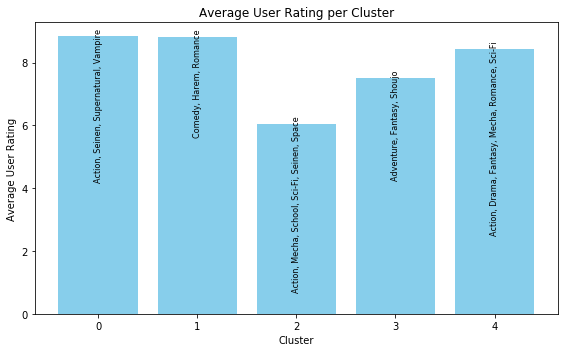

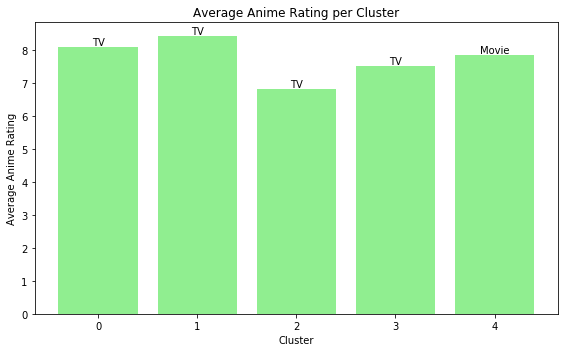

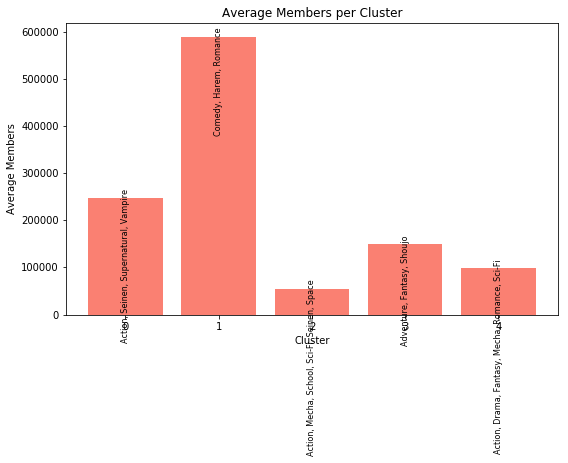

Created cluster profile DataFrame with average ratings, member counts, genres, and types.
Plotted average user rating per cluster with genre annotations.
Plotted average anime rating per cluster with type annotations.
Plotted average member count per cluster with genre annotations.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cluster profile data
cluster_data = {
    'cluster': [0, 1, 2, 3, 4],
    'rating_x': [8.836461, 8.816754, 6.051125, 7.507263, 8.418033],
    'rating_y': [8.100201, 8.415524, 6.808119, 7.527631, 7.838791],
    'members': [246390.860590, 589065.431937, 55198.711656, 148945.654749, 98198.270492],
    'genre': [
        "Action, Seinen, Supernatural, Vampire",
        "Comedy, Harem, Romance",
        "Action, Mecha, School, Sci-Fi, Seinen, Space",
        "Adventure, Fantasy, Shoujo",
        "Action, Drama, Fantasy, Mecha, Romance, Sci-Fi"
    ],
    'type': ["TV", "TV", "TV", "TV", "Movie"]
}

# Create DataFrame
df = pd.DataFrame(cluster_data)

# Plot average user rating per cluster
plt.figure(figsize=(8, 5))
plt.bar(df['cluster'], df['rating_x'], color='skyblue')
plt.title('Average User Rating per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average User Rating')
plt.xticks(df['cluster'])
for i, genre in enumerate(df['genre']):
    plt.text(df['cluster'][i], df['rating_x'][i] + 0.05, genre, ha='center', fontsize=8, rotation=90)
plt.tight_layout()
plt.show()

# Plot average anime rating per cluster
plt.figure(figsize=(8, 5))
plt.bar(df['cluster'], df['rating_y'], color='lightgreen')
plt.title('Average Anime Rating per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Anime Rating')
plt.xticks(df['cluster'])
for i, typ in enumerate(df['type']):
    plt.text(df['cluster'][i], df['rating_y'][i] + 0.05, typ, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plot average members per cluster
plt.figure(figsize=(8, 5))
plt.bar(df['cluster'], df['members'], color='salmon')
plt.title('Average Members per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Members')
plt.xticks(df['cluster'])
for i, genre in enumerate(df['genre']):
    plt.text(df['cluster'][i], df['members'][i] + 5000, genre, ha='center', fontsize=8, rotation=90)
plt.tight_layout()
plt.show()

print("Created cluster profile DataFrame with average ratings, member counts, genres, and types.")
print("Plotted average user rating per cluster with genre annotations.")
print("Plotted average anime rating per cluster with type annotations.")
print("Plotted average member count per cluster with genre annotations.")

In [12]:
import pandas as pd

# Load the anime dataset
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv")

# Drop rows with missing genre values
anime_df = anime_df.dropna(subset=['genre'])

# Split multi-genre strings into individual genres
anime_df['genre_list'] = anime_df['genre'].apply(lambda x: [g.strip() for g in x.split(',')])

# Create a genre set for all unique genres
unique_genres = sorted(set(g for sublist in anime_df['genre_list'] for g in sublist))

# Create one-hot encoded genre columns manually
for genre in unique_genres:
    anime_df[genre] = anime_df['genre_list'].apply(lambda genres: int(genre in genres))

# Save to CSV (optional)
anime_df.to_csv("anime_with_genre_vectors.csv", index=False)

# Preview the result
anime_df.head()

print("Loaded anime and train datasets.")
print("Dropped rows with missing genre values.")
print("Split multi-genre strings into individual genres.")
print("Created a set of all unique genres.")
print("Manually one-hot encoded each genre into separate columns.")
print("Saved the enriched anime dataset with genre vectors to CSV.")

Loaded anime and train datasets.
Dropped rows with missing genre values.
Split multi-genre strings into individual genres.
Created a set of all unique genres.
Manually one-hot encoded each genre into separate columns.
Saved the enriched anime dataset with genre vectors to CSV.


In [13]:
import pandas as pd
from collections import Counter

# Load anime metadata
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv", usecols=["anime_id", "genre"])

# Sample 10 unique user_ids using chunked reading
user_ids = set()
chunk_iter = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", usecols=["user_id"], chunksize=100000)
for chunk in chunk_iter:
    user_ids.update(chunk['user_id'].unique())
    if len(user_ids) >= 10:
        break
sample_users = pd.Series(list(user_ids)).sample(n=10, random_state=42)

# Filter train.csv for sampled users
filtered_rows = []
chunk_iter = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", usecols=["user_id", "anime_id"], chunksize=100000)
for chunk in chunk_iter:
    filtered_chunk = chunk[chunk['user_id'].isin(sample_users)]
    if not filtered_chunk.empty:
        filtered_rows.append(filtered_chunk)
train_df = pd.concat(filtered_rows, ignore_index=True)

# Merge with anime metadata
merged_df = pd.merge(train_df, anime_df, on="anime_id", how="left")
merged_df = merged_df.dropna(subset=['genre'])

# Process genres
merged_df['genre_list'] = merged_df['genre'].apply(lambda x: [g.strip() for g in str(x).split(',')])
all_genres = [g for genres in merged_df['genre_list'] for g in genres]
top_10_genres = [genre for genre, _ in Counter(all_genres).most_common(10)]

# One-hot encode top genres
for genre in top_10_genres:
    merged_df[genre] = merged_df['genre_list'].apply(lambda genres: int(genre in genres))

# Aggregate genre preferences per user
genre_columns = top_10_genres
user_genre_profile = merged_df.groupby('user_id')[genre_columns].sum().reset_index()

# Save to CSV
user_genre_profile.to_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\user_genre_profile.csv", index=False)

print("✅ Saved user_genre_profile.csv with top 10 genre preferences per user.")
print(user_genre_profile.head())

✅ Saved user_genre_profile.csv with top 10 genre preferences per user.
   user_id  Comedy  Action  Fantasy  Shounen  Adventure  Supernatural  \
0       69       3       3        2        2          0             1   
1      122      81      33       30       26         19            25   
2      185      24      27       22       13         20            24   
3      371      36      48       37       43         36            19   
4      517      10      20        4       10          5            14   

   Romance  School  Drama  Sci-Fi  
0        1       3      1       1  
1       42      32      9      18  
2       22       9     23       9  
3        3       5     21      11  
4        5       6      5       4  


In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load user genre profile
user_genre_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\user_genre_profile.csv")

# Extract user vectors (only genre columns)
genre_columns = user_genre_df.columns.drop("user_id")
user_vectors = user_genre_df[genre_columns].values

# Compute cosine similarity between users
similarity_matrix = cosine_similarity(user_vectors)

# Convert to DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=user_genre_df["user_id"], columns=user_genre_df["user_id"])

# Save similarity matrix
similarity_df.to_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\user_similarity_matrix.csv")

print("✅ User similarity matrix saved to user_similarity_matrix.csv")
print(similarity_df.head())

✅ User similarity matrix saved to user_similarity_matrix.csv
user_id      69        122       185       371       517       581       654   \
user_id                                                                         
69       1.000000  0.890677  0.819358  0.808696  0.856996  0.910534  0.922371   
122      0.890677  1.000000  0.861531  0.776270  0.793155  0.968238  0.887598   
185      0.819358  0.861531  1.000000  0.884828  0.890408  0.916756  0.949264   
371      0.808696  0.776270  0.884828  1.000000  0.869623  0.885905  0.886148   
517      0.856996  0.793155  0.890408  0.869623  1.000000  0.833989  0.966148   

user_id      767       1042      1278  
user_id                                
69       0.879798  0.829950  0.807235  
122      0.857501  0.822658  0.770007  
185      0.838195  0.878729  0.934651  
371      0.627863  0.965814  0.964147  
517      0.740138  0.851472  0.935192  


In [15]:
import os
import re
import numpy as np
import pandas as pd

# ====== CONFIG ======
PATH = r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\user_similarity_matrix.csv"
OUT  = r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\most_similar_users.csv"
TOP_K = 3  # number of nearest neighbours to keep

# ====== HELPERS ======
def _print_axis_info(df, note=""):
    """Quick visibility into how the axes look (dtype + first few labels)."""
    print("\n--- {} ---".format(note))
    print("shape:", df.shape)
    print("index dtype:", df.index.dtype, "| columns dtype:", df.columns.dtype)
    idx_preview = [repr(x) for x in df.index[:5].tolist()]
    col_preview = [repr(x) for x in df.columns[:5].tolist()]
    print("index head:", idx_preview)
    print("cols  head:", col_preview)

def _extract_int_labels(index_like):
    """Extract first integer substring (e.g., 'user_69' -> 69). Non‑parsable -> NaN."""
    s = pd.Index(index_like).astype(str).str.extract(r'(\d+)')[0]
    return pd.to_numeric(s, errors='coerce')

def load_similarity_matrix(path):
    """
    Loads user similarity as a square DataFrame with aligned index/columns.
    Handles:
      • Wide CSV (rows=users, cols=users; may carry quotes or mixed types)
      • Tall CSV (columns like user_id, other_user_id, similarity)
    Attempts dtype harmonization, quote stripping, and last‑resort order alignment
    if the matrix is square & symmetric.
    """
    # 1) Read raw CSV
    df_raw = pd.read_csv(path, encoding='utf-8')

    # 2) Detect tall format and pivot if columns exist (case‑insensitive)
    low2orig = {c.lower(): c for c in df_raw.columns}
    if {'user_id','other_user_id','similarity'}.issubset(low2orig):
        u = low2orig['user_id']
        v = low2orig['other_user_id']
        s = low2orig['similarity']
        print("Detected TALL format → pivoting to WIDE matrix...")
        wide = df_raw.pivot(index=u, columns=v, values=s)
        _print_axis_info(wide, "After pivot (tall→wide)")
        return wide

    # 3) Otherwise treat as wide; re‑read with index_col=0 to capture row labels
    try:
        wide = pd.read_csv(path, index_col=0, encoding='utf-8')
    except Exception:
        # Fallback: use first column as index from already‑loaded df_raw
        wide = df_raw.set_index(df_raw.columns[0])

    _print_axis_info(wide, "Loaded wide matrix (raw)")

    # 4) If any direct index/column overlap exists, subset to the overlap
    common = wide.index.intersection(wide.columns)
    if len(common) > 0:
        return wide.loc[common, common]

    # 5) Harmonize types: strip whitespace and literal quotes from both axes
    wide2 = wide.copy()
    clean = lambda idx: pd.Index(idx.astype(str).str.strip().str.strip("'").str.strip('"'))
    wide2.index   = clean(wide2.index)
    wide2.columns = clean(wide2.columns)
    _print_axis_info(wide2, "After coerce/strip quotes")
    common = wide2.index.intersection(wide2.columns)
    if len(common) > 0:
        return wide2.loc[common, common]

    # 6) Try parsing integer IDs out of labels (e.g., 'user_69', "'69'")
    idx_int = _extract_int_labels(wide2.index)
    col_int = _extract_int_labels(wide2.columns)
    keep_r  = ~idx_int.isna()
    keep_c  = ~col_int.isna()
    if keep_r.any() and keep_c.any():
        w3 = wide2.loc[keep_r, keep_c].copy()
        w3.index   = idx_int[keep_r].astype(int)
        w3.columns = col_int[keep_c].astype(int)
        _print_axis_info(w3, "After extracting integer IDs")
        common = w3.index.intersection(w3.columns)
        if len(common) > 0:
            return w3.loc[common, common]

    # 7) Last resort: if square and (near) symmetric, assume row/col order aligns
    if wide2.shape[0] == wide2.shape[1]:
        try:
            wnum = wide2.apply(pd.to_numeric, errors='coerce')
            sym_ok = np.nanmax(np.abs(wnum.values - wnum.values.T)) < 1e-8
        except Exception:
            sym_ok = False
        if sym_ok:
            print("⚠️  No label overlap, but matrix is square & symmetric — assuming order aligns.")
            wnum.columns = wnum.index
            _print_axis_info(wnum, "Aligned by order (assumed labels)")
            return wnum

    # 8) Give a helpful error if nothing matched
    raise ValueError("No overlap between index and columns (even after coercion). "
                     "Check your CSV headers — row IDs must match column IDs (same dtype/format).")

# ====== LOAD & SANITIZE ======
sim_df = load_similarity_matrix(PATH)

# Convert to numeric matrix and fill any missing similarities with 0.0
sim_df = sim_df.apply(pd.to_numeric, errors='coerce').fillna(0.0)

# Ensure square
if sim_df.shape[0] != sim_df.shape[1]:
    raise ValueError("Matrix is not square after processing. Shape: {}".format(sim_df.shape))

# ====== COMPUTE TOP-K NEIGHBOURS ======
# Work with float array and exclude self‑similarity by setting diagonal = -inf
sim = sim_df.values.astype(float)
np.fill_diagonal(sim, -np.inf)

# Use np.asarray for backward‑compatible pandas (older versions don’t have .to_numpy)
col_labels = np.asarray(sim_df.columns)

results = []
for i, user in enumerate(sim_df.index):
    row = sim[i]
    # choose k carefully when there are few users
    k = min(TOP_K, max(0, len(row) - 1))
    if k == 0:
        top_users = []
    else:
        # Get indices of top‑k values: argpartition then sort those k by score desc
        # Note: kth uses 0‑based index → use k-1
        idx_topk = np.argpartition(-row, kth=k-1)[:k]
        idx_topk = idx_topk[np.argsort(-row[idx_topk])]
        top_users = col_labels[idx_topk].tolist()

    results.append({
        "user_id": user,
        "most_similar_users": ", ".join(map(str, top_users))
    })

similar_users_df = pd.DataFrame(results)
similar_users_df.to_csv(OUT, index=False)

print("\n✅ Saved:", OUT)
print(similar_users_df.head())


--- Loaded wide matrix (raw) ---
shape: (10, 10)
index dtype: int64 | columns dtype: object
index head: ['69', '122', '185', '371', '517']
cols  head: ["'69'", "'122'", "'185'", "'371'", "'517'"]

--- After coerce/strip quotes ---
shape: (10, 10)
index dtype: object | columns dtype: object
index head: ["'69'", "'122'", "'185'", "'371'", "'517'"]
cols  head: ["'69'", "'122'", "'185'", "'371'", "'517'"]

✅ Saved: C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\most_similar_users.csv
  most_similar_users user_id
0      654, 581, 122      69
1       581, 69, 654     122
2     654, 1278, 581     185
3    1042, 1278, 654     371
4     654, 1278, 185     517


In [16]:
import numpy as np
import pandas as pd

# Assumes 'sim_df' already exists from the previous script and is a square numeric DataFrame
# If you restarted the kernel, re-run the loader script first.

TOP_K = 3  # change as needed

# Work on a float array, exclude self-similarity
sim = sim_df.values.astype(float).copy()
np.fill_diagonal(sim, -np.inf)

col_labels = np.asarray(sim_df.columns)
results_rows = []

for i, user in enumerate(sim_df.index):
    row = sim[i]
    k = min(TOP_K, max(0, len(row) - 1))
    if k == 0:
        # pad with blanks if there are no neighbors
        out = {
            'user_id': user,
            **{f'sim_user_{j+1}': '' for j in range(TOP_K)},
            **{f'sim_score_{j+1}': '' for j in range(TOP_K)},
            'most_similar_users': ''
        }
        results_rows.append(out)
        continue

    idx_topk = np.argpartition(-row, kth=k-1)[:k]
    idx_topk = idx_topk[np.argsort(-row[idx_topk])]
    top_users = col_labels[idx_topk].tolist()
    top_scores = row[idx_topk].tolist()

    # Build a row with fixed columns and also a concatenated string for convenience
    out = {'user_id': user}
    for j in range(TOP_K):
        if j < len(top_users):
            out[f'sim_user_{j+1}'] = top_users[j]
            out[f'sim_score_{j+1}'] = top_scores[j]
        else:
            out[f'sim_user_{j+1}'] = ''
            out[f'sim_score_{j+1}'] = ''
    out['most_similar_users'] = ", ".join(map(str, top_users))
    results_rows.append(out)

similar_users_df = pd.DataFrame(
    results_rows,
    columns=['user_id'] +
            [f'sim_user_{j+1}' for j in range(TOP_K)] +
            [f'sim_score_{j+1}' for j in range(TOP_K)] +
            ['most_similar_users']
)

# Save
OUT = r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\most_similar_users.csv"
similar_users_df.to_csv(OUT, index=False)

print("✅ Saved:", OUT)
print(similar_users_df.head())

✅ Saved: C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\most_similar_users.csv
  user_id sim_user_1 sim_user_2 sim_user_3  sim_score_1  sim_score_2  \
0      69        654        581        122     0.922371     0.910534   
1     122        581         69        654     0.968238     0.890677   
2     185        654       1278        581     0.949264     0.934651   
3     371       1042       1278        654     0.965814     0.964147   
4     517        654       1278        185     0.966148     0.935192   

   sim_score_3 most_similar_users  
0     0.890677      654, 581, 122  
1     0.887598       581, 69, 654  
2     0.916756     654, 1278, 581  
3     0.886148    1042, 1278, 654  
4     0.890408     654, 1278, 185  


In [17]:
import numpy as np
import pandas as pd

# Load similarity matrix
similarity_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\user_similarity_matrix.csv", index_col=0)

# Ensure consistent string labels
similarity_df.index = similarity_df.index.astype(str)
similarity_df.columns = similarity_df.columns.astype(str)

# Exclude self-similarity by setting diagonal to -inf
sim = similarity_df.values.astype(float)
np.fill_diagonal(sim, -np.inf)

col_labels = np.asarray(similarity_df.columns)
TOP_K = 3
rows = []

for i, user in enumerate(similarity_df.index):
    row = sim[i]
    k = min(TOP_K, max(0, len(row) - 1))
    if k == 0:
        top_users, top_scores = [], []
    else:
        idx_topk = np.argpartition(-row, kth=k-1)[:k]
        idx_topk = idx_topk[np.argsort(-row[idx_topk])]
        top_users = col_labels[idx_topk].tolist()
        top_scores = row[idx_topk].tolist()

    out = {'user_id': user}
    for j in range(TOP_K):
        out[f'sim_user_{j+1}'] = top_users[j] if j < len(top_users) else ''
        out[f'sim_score_{j+1}'] = round(top_scores[j], 4) if j < len(top_scores) else ''
    out['most_similar_users'] = ", ".join(top_users)
    rows.append(out)

similar_users_df = pd.DataFrame(rows, columns=['user_id'] +
    [f'sim_user_{j+1}' for j in range(TOP_K)] +
    [f'sim_score_{j+1}' for j in range(TOP_K)] +
    ['most_similar_users'])

# Save
out_path = r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\most_similar_users.csv"
similar_users_df.to_csv(out_path, index=False)

print("✅ Saved:", out_path)
print(similar_users_df.head())

✅ Saved: C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\most_similar_users.csv
  user_id sim_user_1 sim_user_2 sim_user_3  sim_score_1  sim_score_2  \
0      69        654        581        122       0.9224       0.9105   
1     122        581         69        654       0.9682       0.8907   
2     185        654       1278        581       0.9493       0.9347   
3     371       1042       1278        654       0.9658       0.9641   
4     517        654       1278        185       0.9661       0.9352   

   sim_score_3 most_similar_users  
0       0.8907      654, 581, 122  
1       0.8876       581, 69, 654  
2       0.9168     654, 1278, 581  
3       0.8861    1042, 1278, 654  
4       0.8904     654, 1278, 185  


In [18]:
import pandas as pd

# Load required data
similar_users_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\most_similar_users.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", usecols=["user_id", "anime_id", "rating"])

# Filter to only the 10 sampled users
sample_user_ids = similar_users_df["user_id"].astype(int).tolist()
train_df = train_df[train_df["user_id"].isin(sample_user_ids)]

# Build recommendations
recommendations = []

for _, row in similar_users_df.iterrows():
    user_id = int(row["user_id"])
    similar_ids = list(map(int, row["most_similar_users"].split(", ")))

    # Anime watched by the user
    user_anime = set(train_df[train_df["user_id"] == user_id]["anime_id"])

    # Anime watched by similar users
    similar_anime = train_df[train_df["user_id"].isin(similar_ids)]
    candidate_anime = similar_anime[~similar_anime["anime_id"].isin(user_anime)]

    # Rank by average rating
    top_recs = (
        candidate_anime.groupby("anime_id")["rating"]
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist()
    )

    recommendations.append({"user_id": user_id, "recommended_anime_ids": ", ".join(map(str, top_recs))})

# Save recommendations
recommendations_df = pd.DataFrame(recommendations)
recommendations_df.to_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\user_recommendations.csv", index=False)

print("✅ Saved user_recommendations.csv with top 5 anime recommendations per user.")
print(recommendations_df.head())

✅ Saved user_recommendations.csv with top 5 anime recommendations per user.
            recommended_anime_ids  user_id
0   6045, 5681, 5258, 5114, 13663       69
1    9135, 1559, 16592, 4382, 572      122
2       6, 849, 1559, 17265, 6702      185
3   10017, 2581, 903, 5152, 10793      371
4  5258, 17265, 9065, 6045, 11771      517


In [19]:
import pandas as pd

# Load required data
similar_users_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\most_similar_users.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", usecols=["user_id", "anime_id", "rating"])

# Filter to only the 10 sampled users
sample_user_ids = similar_users_df["user_id"].astype(int).tolist()
train_df = train_df[train_df["user_id"].isin(sample_user_ids)]

# Build recommendations
recommendations = []

for _, row in similar_users_df.iterrows():
    user_id = int(row["user_id"])
    similar_ids = list(map(int, row["most_similar_users"].split(", ")))

    # Anime watched by the user
    user_anime = set(train_df[train_df["user_id"] == user_id]["anime_id"])

    # Anime watched by similar users
    similar_anime = train_df[train_df["user_id"].isin(similar_ids)]
    candidate_anime = similar_anime[~similar_anime["anime_id"].isin(user_anime)]

    # Rank by average rating
    top_recs = (
        candidate_anime.groupby("anime_id")["rating"]
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist()
    )

    recommendations.append({"user_id": user_id, "recommended_anime_ids": ", ".join(map(str, top_recs))})

# Save recommendations
recommendations_df = pd.DataFrame(recommendations)
recommendations_df.to_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\user_recommendations.csv", index=False)

print("✅ Saved user_recommendations.csv with top 5 anime recommendations per user.")
print(recommendations_df.head())

✅ Saved user_recommendations.csv with top 5 anime recommendations per user.
            recommended_anime_ids  user_id
0   6045, 5681, 5258, 5114, 13663       69
1    9135, 1559, 16592, 4382, 572      122
2       6, 849, 1559, 17265, 6702      185
3   10017, 2581, 903, 5152, 10793      371
4  5258, 17265, 9065, 6045, 11771      517


In [20]:
import pandas as pd

# Load recommendations and anime metadata
recs_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\user_recommendations.csv")
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv", usecols=["anime_id", "name", "genre"])

# Manually expand recommended anime_ids
expanded_rows = []
for _, row in recs_df.iterrows():
    user_id = row["user_id"]
    anime_ids = str(row["recommended_anime_ids"]).split(", ")
    for anime_id in anime_ids:
        expanded_rows.append({"user_id": user_id, "anime_id": int(anime_id)})

recs_expanded = pd.DataFrame(expanded_rows)

# Merge with anime metadata
enriched_recs = pd.merge(recs_expanded, anime_df, on="anime_id", how="left")

# Group back into user-level recommendations
final_recs = enriched_recs.groupby("user_id").apply(
    lambda x: x[["name", "genre"]].to_dict(orient="records")
).reset_index(name="recommendations")

# Save to CSV
final_recs.to_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\enriched_user_recommendations.csv", index=False)

print("✅ Saved enriched_user_recommendations.csv with anime titles and genres.")
print(final_recs.head())

✅ Saved enriched_user_recommendations.csv with anime titles and genres.
   user_id                                    recommendations
0       69  [{'name': 'Kimi ni Todoke', 'genre': 'Romance,...
1      122  [{'name': 'Fullmetal Alchemist: The Sacred Sta...
2      185  [{'name': 'Trigun', 'genre': 'Action, Comedy, ...
3      371  [{'name': 'Dragon Ball: Super Saiya-jin Zetsum...
4      517  [{'name': 'Hajime no Ippo: New Challenger', 'g...


📋 Top Recommendations per User:

User 69:
 - Kimi ni Todoke (Romance, School, Shoujo, Slice of Life)
 - Summer Wars (Comedy, Sci-Fi)
 - Hajime no Ippo: New Challenger (Comedy, Drama, Shounen, Sports)
 - Fullmetal Alchemist: Brotherhood (Action, Adventure, Drama, Fantasy, Magic, Military, Shounen)
 - To LOVE-Ru Darkness (Comedy, Ecchi, Harem, Romance, School, Sci-Fi, Shounen)

User 122:
 - Fullmetal Alchemist: The Sacred Star of Milos (Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen)
 - Shijou Saikyou no Deshi Kenichi (Action, Comedy, Martial Arts, School, Shounen)
 - Danganronpa: Kibou no Gakuen to Zetsubou no Koukousei The Animation (Action, Horror, Mystery, Psychological)
 - Suzumiya Haruhi no Yuuutsu (2009) (Comedy, Mystery, Parody, Romance, School, Sci-Fi, Slice of Life)
 - Kaze no Tani no Nausicaä (Adventure, Fantasy)

User 185:
 - Trigun (Action, Comedy, Sci-Fi)
 - Suzumiya Haruhi no Yuuutsu (Comedy, Mystery, Parody, School, Sci-Fi, Slice of Life)
 - Shijou Sa

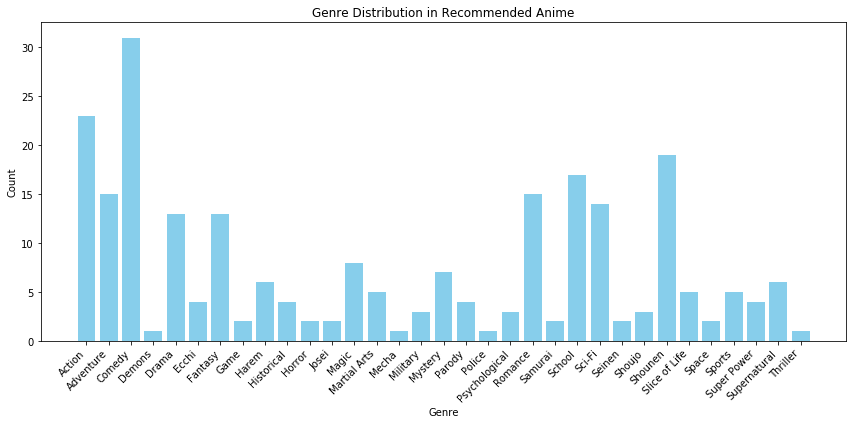

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load enriched recommendations
df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\enriched_user_recommendations.csv")

# Display as table
print("📋 Top Recommendations per User:")
for _, row in df.iterrows():
    print(f"\nUser {row['user_id']}:")
    for rec in eval(row['recommendations']):
        print(f" - {rec['name']} ({rec['genre']})")

# Optional: Bar chart of number of recommendations per genre
# Flatten genre data
genre_counts = {}
for rec_list in df["recommendations"]:
    for rec in eval(rec_list):
        genres = [g.strip() for g in rec["genre"].split(",")]
        for g in genres:
            genre_counts[g] = genre_counts.get(g, 0) + 1

# Plot
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Genre Distribution in Recommended Anime")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [22]:
# ============================
# Compatibility imports for metrics (run this first)
# ============================
import warnings, sklearn
from packaging import version

print("scikit-learn version:", sklearn.__version__)

# Always available
from sklearn.metrics import silhouette_score

# Calinski–Harabasz: new name (preferred) vs old misspelling fallback
try:
    from sklearn.metrics import calinski_harabasz_score
except Exception:
    try:
        from sklearn.metrics import calinski_harabaz_score as calinski_harabasz_score
        warnings.warn(
            "Using deprecated calinski_harabaz_score (older scikit-learn); "
            "consider upgrading scikit-learn for calinski_harabasz_score."
        )
    except Exception:
        calinski_harabasz_score = None
        warnings.warn("Calinski–Harabasz not available in this scikit-learn build.")

# Davies–Bouldin (added in newer versions)
try:
    from sklearn.metrics import davies_bouldin_score
except Exception:
    davies_bouldin_score = None
    warnings.warn("Davies–Bouldin not available in this scikit-learn build.")

scikit-learn version: 0.19.1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Using deprecated calinski_harabaz_score (older scikit-learn); consider upgrading scikit-learn for calinski_harabasz_score.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Davies–Bouldin not available in this scikit-learn build.


In [23]:
# ===========================
# Cell A: Create merged_df if missing, with required columns
# ===========================
import os
import pandas as pd
import numpy as np

def _load_sources():
    """Use in-memory dfs if present; otherwise read from disk (adjust PATH_ROOT if needed)."""
    if 'anime_df' in globals() and 'train_df' in globals():
        adf = anime_df[['anime_id', 'genre', 'type', 'rating', 'members']].copy()
        tdf = train_df[['user_id', 'anime_id', 'rating']].copy()
        return adf, tdf

    # ---- adjust this path if your project lives elsewhere ----
    PATH_ROOT = r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901"
    anime_path = os.path.join(PATH_ROOT, "anime.csv")
    train_path = os.path.join(PATH_ROOT, "train.csv")

    adf = pd.read_csv(anime_path, usecols=['anime_id','genre','type','rating','members'])
    # keep it light to avoid memory issues in this env
    tdf = pd.read_csv(train_path, usecols=['user_id','anime_id','rating'], nrows=100000)
    return adf, tdf

def _prepare_merged_df():
    adf, tdf = _load_sources()

    # Ensure proper dtypes
    for col in ['rating','members']:
        if col in adf.columns:
            adf[col] = pd.to_numeric(adf[col], errors='coerce')

    tdf['rating'] = pd.to_numeric(tdf['rating'], errors='coerce')

    # Merge
    m = pd.merge(tdf, adf, on='anime_id', how='left')

    # Drop rows missing critical fields
    m = m.dropna(subset=['genre','type','rating_x','rating_y','members'])

    # Encode text to categorical codes
    m['genre'] = m['genre'].astype(str)
    m['type']  = m['type'].astype(str)
    m['genre_encoded'] = m['genre'].astype('category').cat.codes
    m['type_encoded']  = m['type'].astype('category').cat.codes

    # Final sanity: keep numeric
    for col in ['rating_x','rating_y','members','genre_encoded','type_encoded']:
        m[col] = pd.to_numeric(m[col], errors='coerce')
    m = m.dropna(subset=['rating_x','rating_y','members'])

    return m

# Build merged_df only if not already defined
if 'merged_df' not in globals():
    merged_df = _prepare_merged_df()
    print("merged_df ready:", merged_df.shape)
    print("Columns present:", [c for c in ['rating_x','rating_y','members','genre_encoded','type_encoded'] if c in merged_df.columns])
else:
    print("merged_df already exists:", merged_df.shape)

merged_df already exists: (592, 14)


In [24]:
def pca_reduce(X_scaled, n_components=None, random_state=42):
    """
    Reduce with PCA for clustering (retain as many comps as available, unless a smaller
    n_components is explicitly provided), and also make a 2D PCA for plotting.
    """
    n_feat = X_scaled.shape[1]
    # if n_components is None -> use all available features (best you can do)
    if n_components is None:
        n_comp = n_feat
    else:
        n_comp = max(1, min(int(n_components), n_feat))  # clamp to [1, n_feat]

    # PCA for clustering space
    pca = PCA(n_components=n_comp, random_state=random_state)
    X_pca = pca.fit_transform(X_scaled)

    # A separate 2D PCA for visualization
    pca2 = PCA(n_components=2, random_state=random_state)
    X_pca_2d = pca2.fit_transform(X_scaled)

    return X_pca, pca, X_pca_2d, pca2

In [25]:
# ===========================
# R1 (schema-aware): Rebuild df_used, X_scaled, X_pca, X_pca_2d
# Works with either:
#   A) "classic" features: rating_x, rating_y, members, genre_encoded, type_encoded
#   B) one-hot genre columns (e.g., 'Action','Comedy','Sci-Fi', ...)
# Choose TARGET_LEVEL = 'anime' or 'user' when using option B.
# ===========================
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- CONFIG (only used when we need to reload from disk) ---
ROOT = r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901"
TRAIN_NROWS = 100000
SAMPLE_N = 30000        # downsample used rows for speed; set None to use all
SEED = 42
TARGET_LEVEL = 'anime'  # <-- change to 'user' if you want user-level aggregates with one-hot genres

# ---------- 1) Ensure merged_df exists ----------
def _load_sources():
    if 'anime_df' in globals() and 'train_df' in globals():
        adf = anime_df
        tdf = train_df
        return adf, tdf

    anime_path = os.path.join(ROOT, "anime.csv")
    train_path = os.path.join(ROOT, "train.csv")

    adf = pd.read_csv(anime_path, encoding='utf-8') if os.path.exists(anime_path) else None
    tdf = pd.read_csv(train_path, nrows=TRAIN_NROWS, encoding='utf-8') if os.path.exists(train_path) else None
    return adf, tdf

def _prepare_merged_df_classic():
    """Build merged_df with the 5 classic features from anime.csv + train.csv."""
    adf, tdf = _load_sources()
    if adf is None or tdf is None:
        raise ValueError("anime.csv / train.csv not found and classic features are missing in memory.")

    usecols_anime = [c for c in ['anime_id','name','genre','type','rating','members'] if c in adf.columns]
    usecols_train = [c for c in ['user_id','anime_id','rating'] if c in tdf.columns]
    adf = adf.loc[:, usecols_anime].copy()
    tdf = tdf.loc[:, usecols_train].copy()

    # numeric coercion
    for c in ['rating','members']:
        if c in adf.columns:
            adf[c] = pd.to_numeric(adf[c], errors='coerce')
    if 'rating' in tdf.columns:
        tdf['rating'] = pd.to_numeric(tdf['rating'], errors='coerce')

    m = pd.merge(tdf, adf, on='anime_id', how='left')  # rating_x (user), rating_y (anime)
    req = [c for c in ['genre','type','rating_x','rating_y','members'] if c in m.columns]
    m = m.dropna(subset=req)

    # encodings
    if 'genre' in m.columns:
        m['genre'] = m['genre'].astype(str)
        m['genre_encoded'] = m['genre'].astype('category').cat.codes
    else:
        m['genre_encoded'] = np.nan

    if 'type' in m.columns:
        m['type'] = m['type'].astype(str)
        m['type_encoded'] = m['type'].astype('category').cat.codes
    else:
        m['type_encoded'] = np.nan

    # ensure numeric
    for c in ['rating_x','rating_y','members','genre_encoded','type_encoded']:
        if c in m.columns:
            m[c] = pd.to_numeric(m[c], errors='coerce')

    m = m.dropna(subset=['rating_x','rating_y','members','genre_encoded','type_encoded'])
    return m

def _detect_one_hot_genres(df):
    """Return a list of columns that look like 0/1 genre one-hots (excluding id/text)."""
    exclude = {'user_id','anime_id','name','genre','genre_list','type'}
    genre_cols = []
    for c in df.columns:
        if c in exclude: 
            continue
        s = df[c]
        # must be numeric and mostly 0/1
        if pd.api.types.is_numeric_dtype(s):
            vals = s.dropna().unique()
            if len(vals) > 0 and set(np.unique(vals)).issubset({0,1}):
                genre_cols.append(c)
    return genre_cols

# If merged_df is not in memory, attempt to build it via classic path
if 'merged_df' not in globals():
    try:
        merged_df = _prepare_merged_df_classic()
        print("created merged_df (classic):", merged_df.shape)
    except Exception as e:
        raise ValueError("merged_df not in memory and classic merge could not be built:\n{}".format(e))
else:
    print("using existing merged_df:", merged_df.shape)

# ---------- 2) Choose feature path ----------
classic_feats = ['rating_x','rating_y','members','genre_encoded','type_encoded']
have_classic = all(c in merged_df.columns for c in classic_feats)

if have_classic:
    # ---- Path A: classic features present ----
    feature_cols = classic_feats
    # optional profiling columns (include if present)
    optional_cols = [c for c in ['anime_id','user_id','name','genre','type'] if c in merged_df.columns]
    df_used = merged_df.loc[:, feature_cols + optional_cols].dropna(subset=feature_cols).reset_index(drop=True)
    path_used = "classic (rating_x, rating_y, members, genre_encoded, type_encoded)"

else:
    # ---- Path B: fallback to one-hot genre features ----
    genre_cols = _detect_one_hot_genres(merged_df)
    if not genre_cols:
        raise ValueError("No classic features OR one-hot genre columns found. "
                         "Available columns: {}".format(list(merged_df.columns)))

    if TARGET_LEVEL.lower() == 'anime' and 'anime_id' in merged_df.columns:
        # consolidate to one row per anime_id (max/any over 0/1 one-hots)
        grp = merged_df.groupby('anime_id', as_index=False)
        features = grp[genre_cols].max()          # max over 0/1 gives 0/1
        keep = grp[['genre','genre_list']].first() if 'genre' in merged_df.columns or 'genre_list' in merged_df.columns else None
        df_used = features if keep is None else pd.merge(features, keep, on='anime_id', how='left')
        feature_cols = genre_cols
        optional_cols = [c for c in ['genre','genre_list'] if c in df_used.columns]
        path_used = "one-hot genres • level=anime ({} features)".format(len(feature_cols))

    elif TARGET_LEVEL.lower() == 'user' and 'user_id' in merged_df.columns:
        # consolidate to one row per user_id (mean genre preference over 0/1 one-hots)
        grp = merged_df.groupby('user_id', as_index=False)
        features = grp[genre_cols].mean()         # mean ~ preference share
        df_used = features
        feature_cols = genre_cols
        optional_cols = []
        path_used = "one-hot genres • level=user ({} features)".format(len(feature_cols))

    else:
        # auto-pick whichever id is present
        id_col = 'anime_id' if 'anime_id' in merged_df.columns else 'user_id' if 'user_id' in merged_df.columns else None
        if id_col is None:
            raise ValueError("Neither anime_id nor user_id present for one-hot aggregation.")
        grp = merged_df.groupby(id_col, as_index=False)
        features = grp[genre_cols].max()
        df_used = features
        feature_cols = genre_cols
        optional_cols = []
        path_used = "one-hot genres • level={} ({} features)".format(id_col.replace('_id',''), len(feature_cols))

# Optional sub-sample for speed
if SAMPLE_N is not None and len(df_used) > SAMPLE_N:
    df_used = df_used.sample(SAMPLE_N, random_state=SEED).reset_index(drop=True)

# ---------- 3) Scale & PCA ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_used[feature_cols].values)

n_feat = X_scaled.shape[1]
pca = PCA(n_components=n_feat, random_state=SEED)
X_pca = pca.fit_transform(X_scaled)

pca2 = PCA(n_components=2, random_state=SEED)
X_pca_2d = pca2.fit_transform(X_scaled)

print("Ready:")
print("  • path_used:", path_used)
print("  • df_used:", df_used.shape)
print("  • features:", feature_cols[:10], ("... (+{})".format(len(feature_cols)-10) if len(feature_cols)>10 else ""))
print("  • X_pca:", X_pca.shape, "| X_pca_2d:", X_pca_2d.shape)
print("  • optionals included:", [c for c in optional_cols])

using existing merged_df: (592, 14)
Ready:
  • path_used: one-hot genres • level=anime (10 features)
  • df_used: (408, 13)
  • features: ['Comedy', 'Action', 'Fantasy', 'Shounen', 'Adventure', 'Supernatural', 'Romance', 'School', 'Drama', 'Sci-Fi'] 
  • X_pca: (408, 10) | X_pca_2d: (408, 2)
  • optionals included: ['genre', 'genre_list']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
def sweep_gmm_metrics(X, k_range=range(2, 13), random_state=42,
                      covariance_type='full', n_init=1,
                      sil_sample_size=5000, sil_metric='euclidean'):
    """
    GMM sweep with memory-safe Silhouette evaluation on a subsample.
    - X: PCA features (we'll cast to float32 to reduce footprint)
    - sil_sample_size: cap for silhouette_score sampling
    """
    import numpy as np
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_score

    X = np.asarray(X, dtype=np.float32)  # smaller dtype for distance ops
    rows, models = [], {}
    n = X.shape[0]
    eval_n = min(int(sil_sample_size), n)

    for k in k_range:
        gmm = GaussianMixture(n_components=k, covariance_type=covariance_type,
                              random_state=random_state, n_init=n_init)
        gmm.fit(X)
        labels = gmm.predict(X)

        # --- AIC/BIC on full X (cheap) ---
        aic = gmm.aic(X)
        bic = gmm.bic(X)

        # --- Silhouette on a subsample (to avoid O(n^2) memory blow-up) ---
        try:
            sil = silhouette_score(X, labels, metric=sil_metric,
                                   sample_size=eval_n, random_state=random_state)
        except Exception as e:
            sil = np.nan  # if any memory hiccup, record NaN and continue

        # --- CH if available in this sklearn (compat shim you ran earlier) ---
        row = {'k': k, 'silhouette': sil, 'bic': bic, 'aic': aic}
        if 'calinski_harabasz_score' in globals() and callable(calinski_harabasz_score):
            try:
                row['calinski_harabasz'] = calinski_harabasz_score(X, labels)
            except Exception:
                pass

        rows.append(row)
        models[k] = (gmm, labels)

    df = pd.DataFrame(rows)
    return df, models

Built KMeans baseline on the fly -> k*=11, labels_final set.
GMM sweep metrics (head):
         aic        bic  calinski_harabasz  k  silhouette
0  5410.7431  5936.2191            74.5839  2      0.1709
1  2329.9738  3120.1934            68.7799  3      0.1753
2   407.9233  1462.8866            63.0357  4      0.1641
3 -3859.2752 -2539.5683            46.5370  5      0.1485
4 -5418.1685 -3833.7180            41.1933  6      0.1411


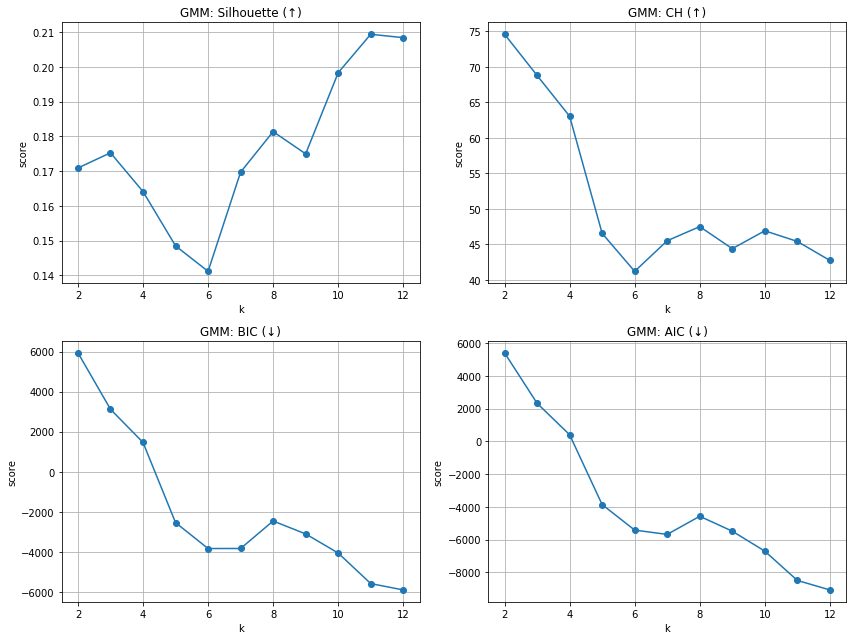


GMM suggested k by BIC (primary): 12
GMM suggested k by Silhouette/CH (secondary): 11
Top Silhouette row:
 aic                 -8490.711451
bic                 -5582.542750
calinski_harabasz      45.408641
k                      11.000000
silhouette              0.209404
Name: 9, dtype: float64

Adjusted Rand Index (GMM vs KMeans): 0.4679
Mapping (GMM -> KMeans): {0: 2, 1: 9, 2: 5, 3: 7, 4: 6, 5: 0, 6: 3, 7: 0, 8: 2, 9: 4, 10: 1, 11: 8}

Contingency table (after mapping):
 GMM(matched)   0   1   2   3   4   5   6  7   8   9
KMeans                                             
0             48   0   3   0   0   0   0  1   0   0
1              4  33   0   0   0  11   0  0   0   0
2              0   0  20   0   0   9   1  0  22   0
3              0   0   0  24   0   0   0  0   0   0
4              0   0   2   0  34   0   0  0   0   0
5              0  12   2   1   0  13   0  2   0   3
6             15   0   3   1   2   0  13  0   0   0
7             18   0   6   0   1   5   0  4   0   5
8

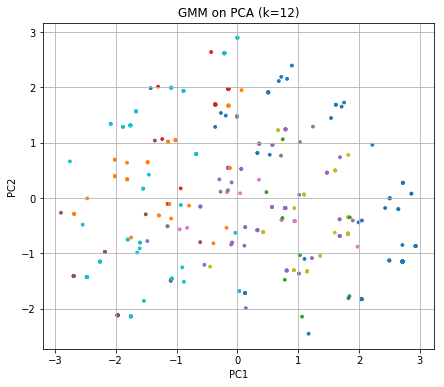


Saved: gmm_k_sweep_metrics.csv


In [27]:
# ===========================
# PART 2 (resilient): Ensure KMeans baseline, then GMM sweep + comparison
# Compatible with sklearn 0.19.1
# ===========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# ---- safety: need PCA matrices from R1/Part 1 ----
for needed in ['X_pca', 'X_pca_2d']:
    if needed not in globals():
        raise RuntimeError("Missing {}. Please run your R1/Part 1 (to build PCA) before Part 2.".format(needed))

# ---- metrics fallback for CH (older sklearn) ----
try:
    from sklearn.metrics import calinski_harabasz_score  # new
except Exception:
    try:
        from sklearn.metrics import calinski_harabaz_score as calinski_harabasz_score  # old
    except Exception:
        calinski_harabasz_score = None

# -----------------------------
# 1) Ensure KMeans baseline exists (labels_final, km_final, k_star)
# -----------------------------
def _kmeans_sweep_and_pick(X, k_range=range(2, 13), n_init=10, random_state=42, sil_sample_size=None):
    rows, models = [], {}
    X = np.asarray(X, dtype=np.float32)
    n = X.shape[0]
    eval_n = min(int(sil_sample_size or n), n)
    for k in k_range:
        km = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
        labels = km.fit_predict(X)
        try:
            sil = silhouette_score(X, labels, sample_size=eval_n, random_state=random_state)
        except Exception:
            sil = np.nan
        row = {'k': k, 'silhouette': sil, 'inertia': km.inertia_}
        if calinski_harabasz_score is not None:
            try:
                row['calinski_harabasz'] = calinski_harabasz_score(X, labels)
            except Exception:
                pass
        rows.append(row)
        models[k] = (km, labels)
    df = pd.DataFrame(rows)
    # pick k by silhouette (desc) then inertia (asc)
    best = df.sort_values(['silhouette','inertia'], ascending=[False, True]).iloc[0]
    return int(best['k']), df, models

if 'labels_final' not in globals() or 'km_final' not in globals() or 'k_star' not in globals():
    # For large datasets you may set sil_sample_size=3000 to avoid O(n^2) memory;
    # for your current small size it's fine to leave None.
    k_star, _km_df, models = _kmeans_sweep_and_pick(X_pca, sil_sample_size=None)
    km_final, labels_final = models[k_star]
    print("Built KMeans baseline on the fly -> k*={}, labels_final set.".format(k_star))
else:
    # ensure labels and model are usable
    try:
        _ = km_final.predict(X_pca[:2])
    except Exception:
        km_final = KMeans(n_clusters=int(k_star), n_init=10, random_state=42).fit(X_pca)
        labels_final = km_final.labels_
        print("Re-fitted KMeans baseline with k={}.".format(k_star))

# -----------------------------
# 2) GMM sweep (BIC/AIC + Silhouette + CH if available)
# -----------------------------
def sweep_gmm_metrics(X, k_range=range(2, 13), random_state=42, covariance_type='full', n_init=1,
                      sil_sample_size=None):
    rows, models = [], {}
    X = np.asarray(X, dtype=np.float32)
    n = X.shape[0]
    eval_n = min(int(sil_sample_size or n), n)
    for k in k_range:
        gmm = GaussianMixture(n_components=k, covariance_type=covariance_type,
                              random_state=random_state, n_init=n_init)
        gmm.fit(X)
        labels = gmm.predict(X)
        # metrics
        aic = gmm.aic(X); bic = gmm.bic(X)
        try:
            sil = silhouette_score(X, labels, sample_size=eval_n, random_state=random_state)
        except Exception:
            sil = np.nan
        row = {'k': k, 'silhouette': sil, 'bic': bic, 'aic': aic}
        if calinski_harabasz_score is not None:
            try:
                row['calinski_harabasz'] = calinski_harabasz_score(X, labels)
            except Exception:
                pass
        rows.append(row)
        models[k] = (gmm, labels)
    df = pd.DataFrame(rows)
    return df, models

def plot_gmm_selection(df):
    fig, axes = plt.subplots(2, 2, figsize=(12, 9))
    axes = axes.ravel()
    axes[0].plot(df['k'], df['silhouette'], marker='o'); axes[0].set_title('GMM: Silhouette (↑)'); axes[0].grid(True)
    if 'calinski_harabasz' in df.columns:
        axes[1].plot(df['k'], df['calinski_harabasz'], marker='o'); axes[1].set_title('GMM: CH (↑)'); axes[1].grid(True)
    else:
        axes[1].text(0.5,0.5,'CH not available', ha='center', va='center', transform=axes[1].transAxes); axes[1].set_axis_off()
    axes[2].plot(df['k'], df['bic'], marker='o'); axes[2].set_title('GMM: BIC (↓)'); axes[2].grid(True)
    axes[3].plot(df['k'], df['aic'], marker='o'); axes[3].set_title('GMM: AIC (↓)'); axes[3].grid(True)
    for ax in axes: ax.set_xlabel('k'); ax.set_ylabel('score')
    plt.tight_layout(); plt.show()

def suggest_k_gmm(df):
    k_bic = int(df.loc[df['bic'].idxmin(), 'k'])
    if 'calinski_harabasz' in df.columns:
        sec = df.sort_values(['silhouette','calinski_harabasz'], ascending=[False, False]).iloc[0]
    else:
        sec = df.sort_values(['silhouette'], ascending=[False]).iloc[0]
    return k_bic, int(sec['k']), sec

def map_to_reference(y_ref, y_pred):
    mapping = {}
    y_mapped = np.zeros_like(y_pred)
    for c in np.unique(y_pred):
        mask = (y_pred == c)
        ref, cnt = np.unique(y_ref[mask], return_counts=True)
        mapping[int(c)] = int(ref[np.argmax(cnt)])
        y_mapped[mask] = mapping[int(c)]
    return y_mapped, mapping

# Run the sweep (sample_size=None is fine for small X; set to 3000 for big X)
gmm_df, gmm_models = sweep_gmm_metrics(X_pca, k_range=range(2, 13), random_state=42,
                                       covariance_type='full', n_init=1, sil_sample_size=None)
print("GMM sweep metrics (head):")
print(gmm_df.head().round(4))

plot_gmm_selection(gmm_df)

k_bic, k_sil, row_sil = suggest_k_gmm(gmm_df)
print("\nGMM suggested k by BIC (primary):", k_bic)
print("GMM suggested k by Silhouette/CH (secondary):", k_sil)
print("Top Silhouette row:\n", row_sil)

# Fit chosen GMM (use BIC as primary)
gmm_final, gmm_labels = gmm_models[k_bic]

# -----------------------------
# 3) Compare against KMeans baseline
# -----------------------------
y_km = labels_final
y_gm = gmm_labels

ari = adjusted_rand_score(y_km, y_gm)
print("\nAdjusted Rand Index (GMM vs KMeans): {:.4f}".format(ari))

y_gm_mapped, mapping = map_to_reference(y_km, y_gm)
ct = pd.crosstab(pd.Series(y_km, name='KMeans'), pd.Series(y_gm_mapped, name='GMM(matched)'))
print("Mapping (GMM -> KMeans):", mapping)
print("\nContingency table (after mapping):\n", ct)

# 2D PCA scatter of chosen GMM labels
plt.figure(figsize=(7,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=gmm_labels, s=8, cmap='tab10')
plt.title('GMM on PCA (k={})'.format(k_bic)); plt.xlabel('PC1'); plt.ylabel('PC2'); plt.grid(True); plt.show()

# Save sweep
gmm_df.to_csv('gmm_k_sweep_metrics.csv', index=False)
print("\nSaved: gmm_k_sweep_metrics.csv")

In [32]:
# Step 4: Cluster Interpretation

import pandas as pd
import numpy as np

# Load anime metadata and train data
anime_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\anime.csv")
train_df = pd.read_csv(r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901\train.csv", nrows=100000)

# Merge datasets
merged_df = pd.merge(train_df, anime_df, on="anime_id", how="left")
merged_df.dropna(subset=["genre", "type", "rating_x", "members"], inplace=True)

# Sample the same number of rows as labels_final
merged_df = merged_df.sample(n=len(labels_final), random_state=42).reset_index(drop=True)

# Assign cluster labels
merged_df["cluster"] = labels_final

# Define mode function
def get_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Compute cluster summary
cluster_summary = merged_df.groupby("cluster").agg({
    "rating_x": "mean",
    "members": "mean",
    "genre": get_mode,
    "type": get_mode
}).reset_index()

# Rename columns
cluster_summary.rename(columns={
    "rating_x": "avg_user_rating",
    "members": "avg_members",
    "genre": "dominant_genre",
    "type": "dominant_type"
}, inplace=True)

# Display and save
print(cluster_summary)
cluster_summary.to_csv("cluster_summary.csv", index=False)

    cluster  avg_user_rating    avg_members  \
0         0         7.903846  184764.576923   
1         1         7.645833  202368.916667   
2         2         7.884615  182371.173077   
3         3         8.208333  194839.875000   
4         4         7.861111  197762.416667   
5         5         7.696970  210157.454545   
6         6         7.941176  210681.029412   
7         7         7.692308  203106.128205   
8         8         7.633333  184355.233333   
9         9         7.723404  212974.914894   
10       10         8.461538  212431.846154   

                                       dominant_genre dominant_type  
0   Action, Adventure, Comedy, Ecchi, Fantasy, Har...            TV  
1       Comedy, Ecchi, Harem, School, Sci-Fi, Shounen            TV  
2   Action, Comedy, Demons, Seinen, Supernatural, ...            TV  
3                     Comedy, School, Shounen, Sports            TV  
4                     Action, Mystery, Sci-Fi, Seinen            TV  
5           Act

In [34]:
# Step 5: Recommendation System (User Similarity-Based)

import pandas as pd

# Define file paths
BASE_PATH = r"C:\Users\nb162293\OneDrive - Nedbank\Documents\GitHub\Unsupervised_Learning\Unsupervised-Learning-Project-20250901"
anime_path = f"{BASE_PATH}\\anime.csv"
train_path = f"{BASE_PATH}\\train.csv"
similar_path = f"{BASE_PATH}\\most_similar_users.csv"

# Load datasets
anime_df = pd.read_csv(anime_path, usecols=["anime_id", "name", "genre"])
train_df = pd.read_csv(train_path, usecols=["user_id", "anime_id", "rating"])
similar_users_df = pd.read_csv(similar_path)

# Filter to only the users in most_similar_users.csv
sample_user_ids = similar_users_df["user_id"].astype(int).tolist()
train_df = train_df[train_df["user_id"].isin(sample_user_ids)]

# Build recommendations
recommendations = []

for _, row in similar_users_df.iterrows():
    user_id = int(row["user_id"])
    similar_ids = list(map(int, row["most_similar_users"].split(", ")))

    # Anime watched by the user
    user_anime = set(train_df[train_df["user_id"] == user_id]["anime_id"])

    # Anime watched by similar users
    similar_anime = train_df[train_df["user_id"].isin(similar_ids)]
    candidate_anime = similar_anime[~similar_anime["anime_id"].isin(user_anime)]

    # Rank by average rating
    top_recs = (
        candidate_anime.groupby("anime_id")["rating"]
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist()
    )

    recommendations.append({"user_id": user_id, "recommended_anime_ids": ", ".join(map(str, top_recs))})

# Save recommendations
recommendations_df = pd.DataFrame(recommendations)
recommendations_df.to_csv(f"{BASE_PATH}\\user_recommendations.csv", index=False)

# Enrich with anime titles and genres
expanded_rows = []
for _, row in recommendations_df.iterrows():
    user_id = row["user_id"]
    anime_ids = str(row["recommended_anime_ids"]).split(", ")
    for anime_id in anime_ids:
        expanded_rows.append({"user_id": user_id, "anime_id": int(anime_id)})

recs_expanded = pd.DataFrame(expanded_rows)
enriched_recs = pd.merge(recs_expanded, anime_df, on="anime_id", how="left")

# Group back into user-level recommendations
final_recs = enriched_recs.groupby("user_id").apply(
    lambda x: x[["name", "genre"]].to_dict(orient="records")
).reset_index(name="recommendations")

# Save enriched recommendations
final_recs.to_csv(f"{BASE_PATH}\\enriched_user_recommendations.csv", index=False)